In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining p(s1) (phi 1):
phi1 = np.array([0.01,0.01,0.08,0.2,0.7])
phi2 = np.array([0.02,0.02,0.06,0.3,0.6])
phi3 = np.array([0.2,0.2,0.2,0.2,0.2])

In [3]:
# Define prob table for P(r(k) = 1 | sbk, swk)
# sbk - row
# swk - column
def calc_prob_rk(sbk, swk):
    return 0.0052 * (sbk - swk)**3 + 0.0292 * (sbk - swk) + 0.5

probDist_rk = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        probDist_rk[i][j] = calc_prob_rk(i+1,j+1)

probDist_rk

array([[ 0.5   ,  0.4656,  0.4   ,  0.272 ,  0.0504],
       [ 0.5344,  0.5   ,  0.4656,  0.4   ,  0.272 ],
       [ 0.6   ,  0.5344,  0.5   ,  0.4656,  0.4   ],
       [ 0.728 ,  0.6   ,  0.5344,  0.5   ,  0.4656],
       [ 0.9496,  0.728 ,  0.6   ,  0.5344,  0.5   ]])

In [4]:
probDist_rk.sum()

12.5

In [26]:
# Table for factor at 2e; rows -> s2, cols -> s3.
phi1_s2s3 = np.zeros((5,5))
for i in range(5):
    aux = np.matmul(probDist_rk[i].reshape((5,1)),probDist_rk[:,i].reshape((1,5))) * phi1[i]
    phi1_s2s3 = phi1_s2s3 + aux
phi1_s2s3

array([[ 0.09729325,  0.26673664,  0.36353519,  0.41479123,  0.44760707],
       [ 0.08008064,  0.2115047 ,  0.2865536 ,  0.326506  ,  0.35264054],
       [ 0.07040719,  0.1800816 ,  0.24265149,  0.2760736 ,  0.29830464],
       [ 0.06417523,  0.162546  ,  0.2185856 ,  0.24845714,  0.26832371],
       [ 0.05728707,  0.14897654,  0.20111264,  0.22861971,  0.24642209]])

In [6]:
phi1_s2s3 = np.zeros((5,5))
for s2 in range(5):
    for s3 in range(5):
        total = 0
        for s1 in range(5):
            total += calc_prob_rk(s1,s2) * calc_prob_rk(s3,s1) * phi1[s1]
        phi1_s2s3[s2][s3] = total
phi1_s2s3

array([[ 0.09729325,  0.26673664,  0.36353519,  0.41479123,  0.44760707],
       [ 0.08008064,  0.2115047 ,  0.2865536 ,  0.326506  ,  0.35264054],
       [ 0.07040719,  0.1800816 ,  0.24265149,  0.2760736 ,  0.29830464],
       [ 0.06417523,  0.162546  ,  0.2185856 ,  0.24845714,  0.26832371],
       [ 0.05728707,  0.14897654,  0.20111264,  0.22861971,  0.24642209]])

<h1>Q2:f</h1>

<h2>Factor graph for phi2_s2s3 and s2 is black player</h2>

In [35]:
posterior_s3 = np.zeros(5)
for i in range(5):
    aux = np.multiply((1 - probDist_rk[i]),(phi1_s2s3[i])) * phi2[i]
    posterior_s3 += aux
posterior_s3

array([ 0.01037748,  0.05381518,  0.09350372,  0.11994523,  0.14131865])

In [36]:
psi1 = phi3/np.max(phi3)
psi2 = posterior_s3/np.max(posterior_s3)

print('psi1: ' + str(psi1))
print('psi2: ' + str(psi2))

psi1: [ 1.  1.  1.  1.  1.]
psi2: [ 0.07343317  0.38080733  0.66165168  0.84875726  1.        ]


** 2g) **

In [48]:
prob_s3 = np.multiply(psi1,psi2)
prob_s3 = prob_s3/(np.sum(prob_s3))
prob_s3

array([ 0.0247696 ,  0.12844936,  0.22318041,  0.28629262,  0.33730801])

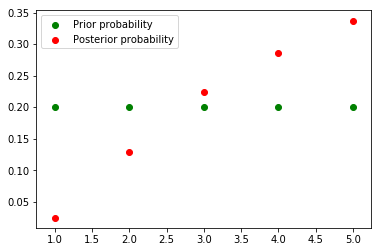

In [49]:
skills = np.arange(1,6)
plt.scatter(skills,phi3,label='Prior probability',color='g')
plt.scatter(skills,prob_s3, label='Posterior probability',color='r')
plt.legend()
plt.show()